**Assignment 2 - Gradient Boosting**

Dataset 1 - Melbourne Olympic Park

Step 1 - Import the Necessary Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


Step 2 - Load the Dataset

In [61]:
# Load the dataset 
data = pd.read_csv('processed_melbourne_olympic.csv')

# Display the first few rows to inspect
data.head()


,time-local,maximum_gust_kmh,air_temperature,maximum_gust_spd,msl_pres,minimum_air_temperature,maximum_gust_dir,wind_dir_deg,pres,rainfall,...,vis_km,wind_spd,wind_dir,wind_spd_kmh,dew_point,rain_ten,wind_gust_spd,gust_kmh,rainfall_24hr,weather
0,2018-01-01 07:00:00+00:00,0.4375,0.628125,0.44186,0.320293,0.623053,SSW,187,0.312649,0.0,...,10.0,0.384615,S,0.395833,0.685606,0.000000,0.428571,0.423077,0.0,NaN
1,2018-01-01 07:10:00+00:00,0.4375,0.621875,0.44186,0.569711,0.616822,SSW,177,0.336516,0.0,...,49.0,0.384615,S,0.395833,0.689394,0.001029,0.333333,0.333333,0.0,NaN
2,2018-01-01 07:20:00+00:00,0.4375,0.631250,0.44186,0.569711,0.610592,SSW,203,0.336516,0.0,...,42.0,0.384615,SSW,0.395833,0.700758,0.001029,0.309524,0.307692,0.0,NaN
3,2018-01-01 07:30:00+00:00,0.4375,0.615625,0.44186,0.325183,0.610592,SSW,189,0.317422,0.0,...,10.0,0.346154,S,0.354167,0.689394,0.000000,0.404762,0.410256,0.0,NaN
4,2018-01-01 07:40:00+00:00,0.4375,0.612500,0.44186,0.569711,0.610592,SSW,185,0.341289,0.0,...,35.0,0.461538,S,0.458333,0.685606,0.001029,0.428571,0.423077,0.0,NaN


Step 3 - Handle Missing Values

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('processed_melbourne_olympic.csv')

# Drop rows with missing values
data.dropna(inplace=True)

Step 4 - Feature Selection

In [3]:
# Define the independent variables (features)
features = ['air_temperature', 'dew_point', 'wind_spd', 'msl_pres', 'rainfall']
X = data[features]
y = data['rel-humidity'] # Target variable (humidity)

Step 5 - Splitting the data in to Training and Testing sets

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6 - Training the Gradient Boosting Regressor Model

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.1,    # Shrinks the contribution of each tree
    max_depth=3,         # Maximum depth of individual regression trees
    random_state=42
)
# Train the model using the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

Step 7 - Making Predictions and Evaluate the Model

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0025
Mean Absolute Error (MAE): 0.0419
R-squared (R²): 0.8939


Step 8 - Visualize the Result

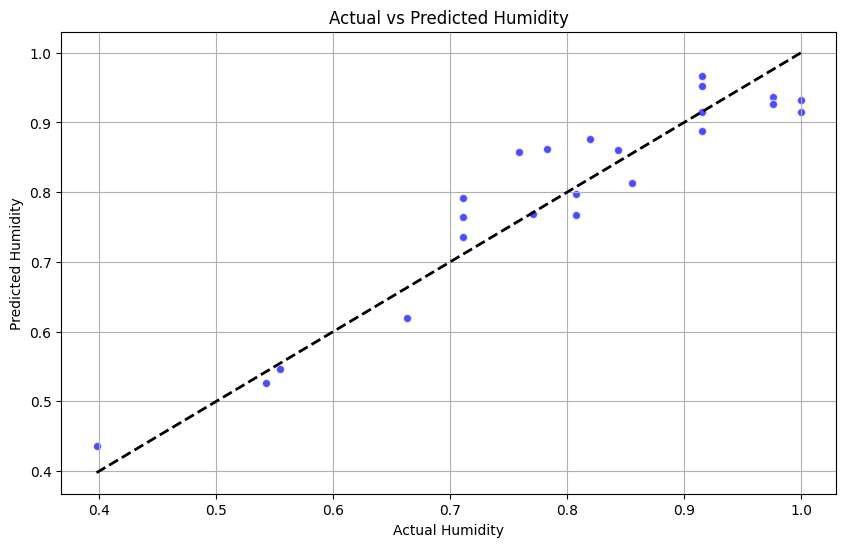

In [11]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Humidity')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.grid(True)
plt.show()

Dataset 2 - Cerberus 

Step 1 - Load the Dataset

In [70]:
# Load your dataset (replace 'your_dataset.csv' with your actual file)
data2 = pd.read_csv('processed_cerberus.csv')

# Display the first few rows to inspect
data2.head()


,time-local,maximum_gust_kmh,air_temperature,msl_pres,minimum_air_temperature,maximum_gust_dir,wind_dir_deg,pres,rainfall,qnh_pres,...,apparent_temp,wind_spd,wind_dir,wind_spd_kmh,dew_point,rain_ten,rain_hour,wind_gust_spd,gust_kmh,rainfall_24hr
0,2018-01-01 07:00:00+00:00,0.411765,0.648810,0.356295,0.645833,SSW,200,0.356295,0.0,0.356295,...,0.554090,0.419355,SSW,0.421053,0.650980,0.000000,0.000000,0.413043,0.411765,0.0
1,2018-01-01 07:10:00+00:00,0.411765,0.654762,0.580456,0.645833,SSW,218,0.580456,0.0,0.580973,...,0.551451,0.419355,SW,0.421053,0.615686,0.002006,0.004318,0.369565,0.376471,0.0
2,2018-01-01 07:20:00+00:00,0.411765,0.648810,0.580456,0.645833,SSW,217,0.580456,0.0,0.580973,...,0.559367,0.387097,SW,0.385965,0.627451,0.002006,0.004318,0.347826,0.352941,0.0
3,2018-01-01 07:30:00+00:00,0.411765,0.645833,0.361045,0.645833,SSW,219,0.361045,0.0,0.361045,...,0.556728,0.387097,SW,0.385965,0.627451,0.000000,0.000000,0.391304,0.388235,0.0
4,2018-01-01 07:40:00+00:00,0.411765,0.642857,0.580456,0.642857,SSW,201,0.580456,0.0,0.580973,...,0.540897,0.419355,SSW,0.421053,0.611765,0.002006,0.004318,0.369565,0.376471,0.0


Step 2 - Handling Missing Values

In [71]:
# Drop rows with missing values
data2.dropna(inplace=True)

Step 3 - Feature Selection

In [72]:
# Define the independent variables (features)
features2 = ['air_temperature', 'dew_point', 'wind_spd', 'msl_pres', 'rainfall']
X_new = data2[features2]
y_new = data2['rel-humidity'] # Target variable (humidity)

Step 4 - Splitting the data into Training and Testing sets

In [73]:
# Split the dataset into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

Step 5 - Training the Gradient Boosting Model

In [74]:
# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.1,    # Shrinks the contribution of each tree
    max_depth=3,         # Maximum depth of individual regression trees
    random_state=42
)
# Train the model using the training data
gbr.fit(X_new_train, y_new_train)

GradientBoostingRegressor(random_state=42)

Step 6 - Making Predictions and Evaluating the Model

In [75]:
# Predict on the test set
y_new_pred = gbr.predict(X_new_test)

# Evaluate the model
new_mse = mean_squared_error(y_new_test, y_new_pred)
new_mae = mean_absolute_error(y_new_test, y_new_pred)
new_r2 = r2_score(y_new_test, y_new_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {new_mse:.4f}")
print(f"Mean Absolute Error (MAE): {new_mae:.4f}")
print(f"R-squared (R²): {new_r2:.4f}")

Mean Squared Error (MSE): 0.0004
Mean Absolute Error (MAE): 0.0149
R-squared (R²): 0.9896


Step 7 - Visualize the Result

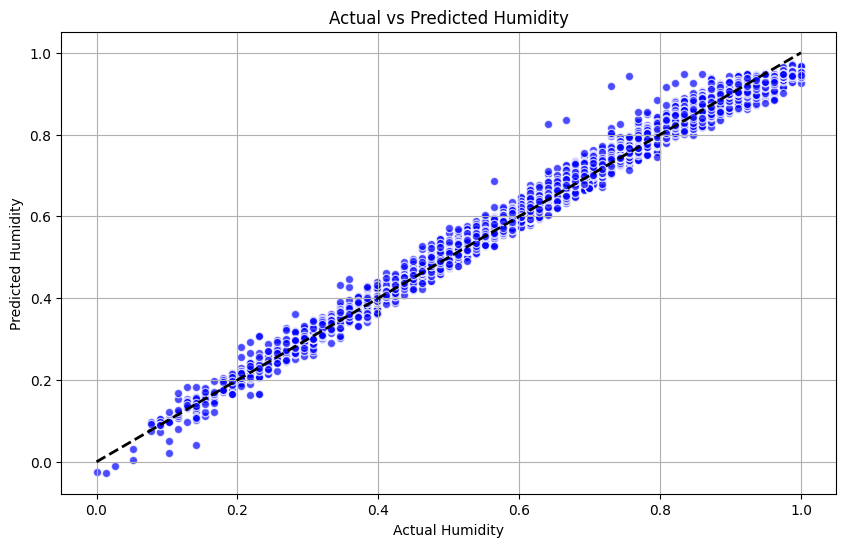

In [77]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_new_test, y_new_pred, color='blue', edgecolor='w', alpha=0.7)
plt.plot([y_new_test.min(), y_new_test.max()], [y_new_test.min(), y_new_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Humidity')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.grid(True)
plt.show()